#Part 1. Data Visualization

**1.1 Insert the real-time column for each signal.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Function to load data and clean it
def load_and_clean_data(filepath):
    data = pd.read_csv(filepath, skiprows=1)
    data['temps (s)'] = data['temps (s)'].str.replace('٫', '.').astype(float)
    data['amplitude (mv)'] = pd.to_numeric(data['amplitude (mv)'], errors='coerce')
    return data

# Load ECG data
ecg1 = load_and_clean_data('/content/ECG1.csv')
ecg2 = load_and_clean_data('/content/ECG2.csv')


In [2]:
ecg1.head()

,sample number,temps (s),amplitude (mv),amplitude (mv).1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,0.0,0.00,3.0,950,NaN,NaN,NaN,NaN
1,1.0,0.00,-13.0,934,NaN,NaN,NaN,NaN
2,2.0,0.01,-13.0,934,NaN,NaN,NaN,NaN
3,3.0,0.01,-9.0,938,NaN,NaN,NaN,NaN
4,4.0,0.01,-9.0,938,NaN,NaN,NaN,NaN


In [3]:
ecg2.head()

,n,temps (s),amplitude (mv),amplitude (mv).1
0,0.0,0.00,-42.0,942.0
1,1.0,0.00,-43.0,941.0
2,2.0,0.01,-40.0,944.0
3,3.0,0.01,-39.0,945.0
4,4.0,0.01,-36.0,948.0


**1.2 Display each of these signals (reduce the width of the display lines for better
readability)**

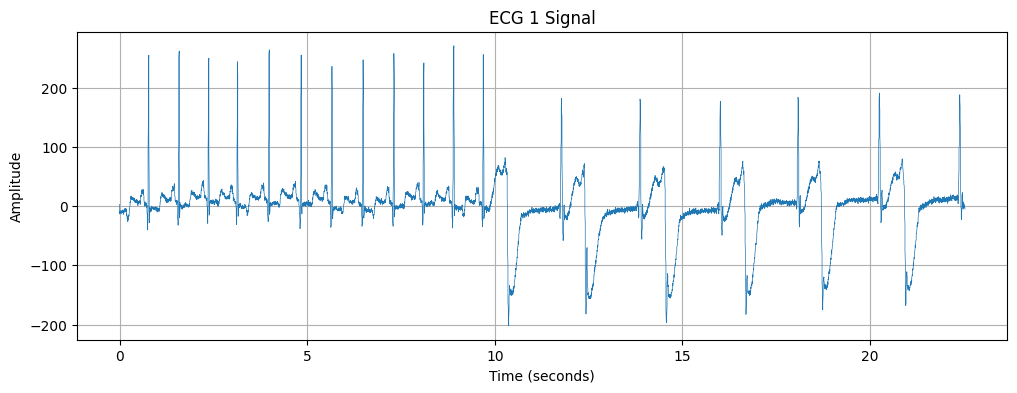

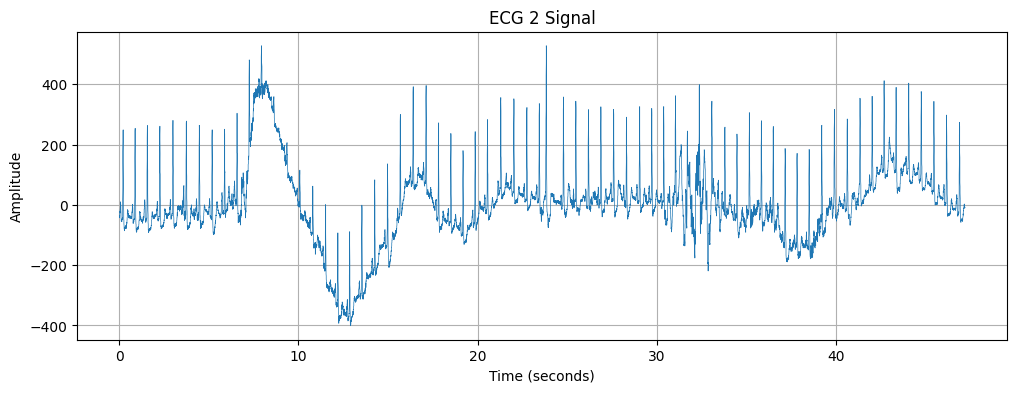

In [4]:
# Plotting function
def plot_ecg(data, title):
    plt.figure(figsize=(12, 4))
    plt.plot(data['temps (s)'], data['amplitude (mv)'], linewidth=0.5)
    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Display each signal
plot_ecg(ecg1, 'ECG 1 Signal')
plot_ecg(ecg2, 'ECG 2 Signal')



**1.3 What filtering types are necessary to improve the readability of data and make
automatic processing possible?**

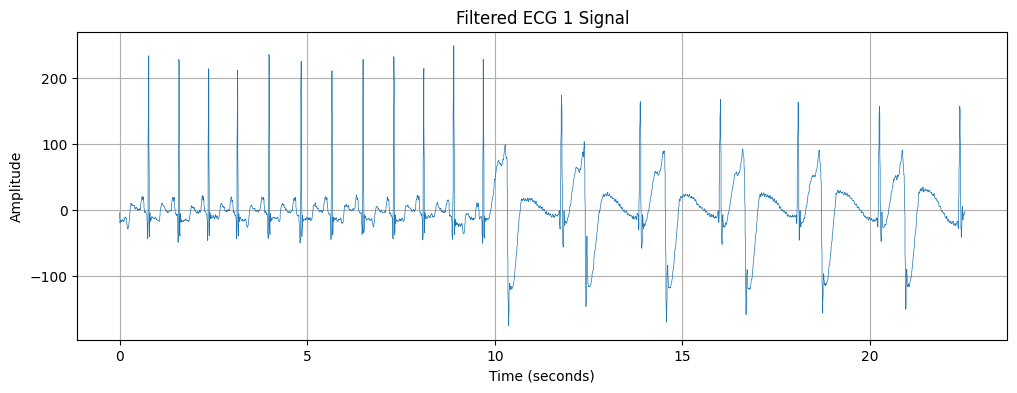

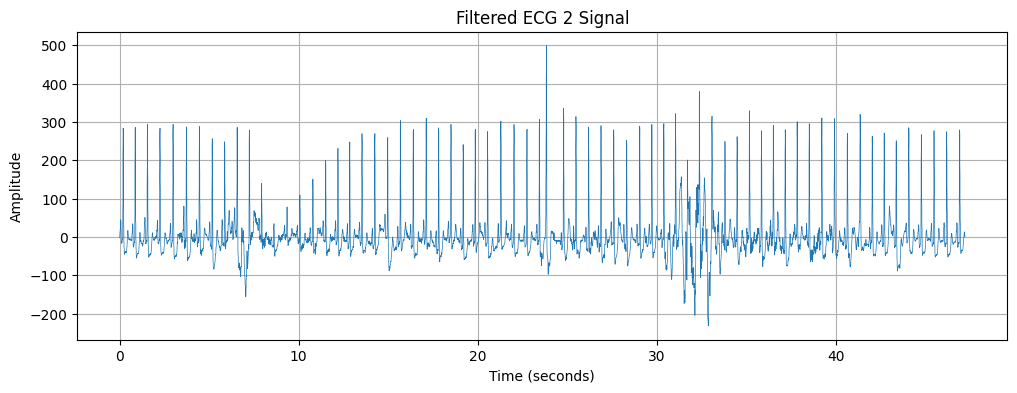

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Function to load data and clean it
def load_and_clean_data(filepath):
    data = pd.read_csv(filepath, skiprows=1)
    data['temps (s)'] = data['temps (s)'].str.replace('٫', '.').astype(float)
    data['amplitude (mv)'] = pd.to_numeric(data['amplitude (mv)'], errors='coerce')
    data['amplitude (mv)'].fillna(method='ffill', inplace=True)  # Handle NaNs
    return data

# Load ECG data
ecg1 = load_and_clean_data('/content/ECG1.csv')
ecg2 = load_and_clean_data('/content/ECG2.csv')

# Plotting function
def plot_ecg(time, amplitude, title):
    plt.figure(figsize=(12, 4))
    plt.plot(time, amplitude, linewidth=0.5)
    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Filter design
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Filter parameters
lowcut = 0.5
highcut = 40.0
fs = 360  # Sampling frequency

# Apply bandpass filter
ecg1_filtered = butter_bandpass_filter(ecg1['amplitude (mv)'], lowcut, highcut, fs)
ecg2_filtered = butter_bandpass_filter(ecg2['amplitude (mv)'], lowcut, highcut, fs)

# Plot the filtered signals
plot_ecg(ecg1['temps (s)'], ecg1_filtered, 'Filtered ECG 1 Signal')
plot_ecg(ecg2['temps (s)'], ecg2_filtered, 'Filtered ECG 2 Signal')


#Part 2. Filtering the ECG

**2.1 The high-pass filter**

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


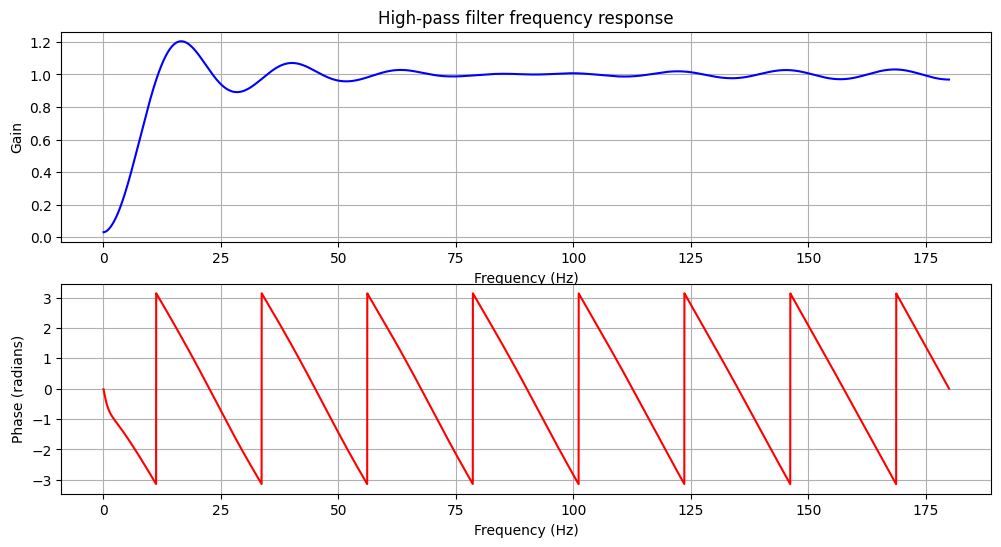

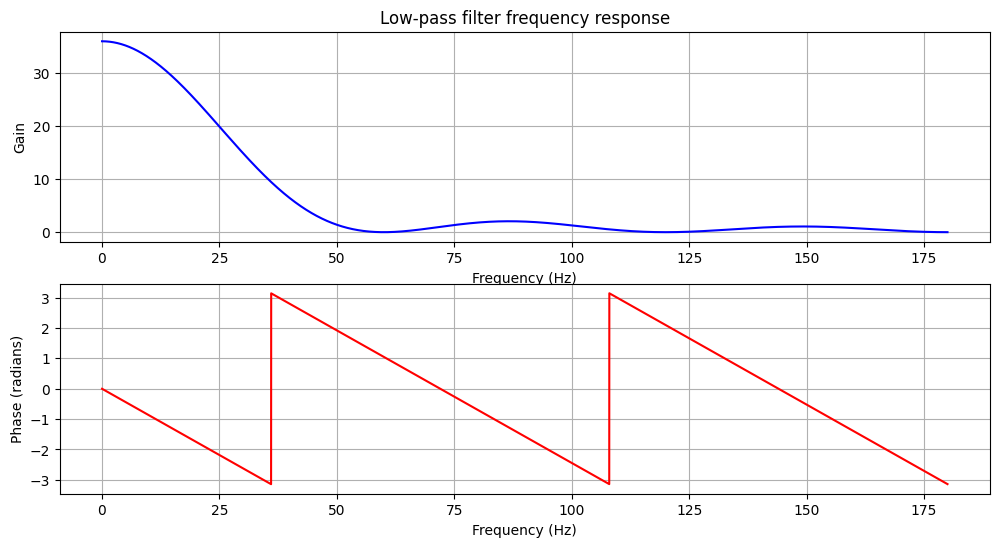

The high-pass filter is IIR.
The low-pass filter is IIR.


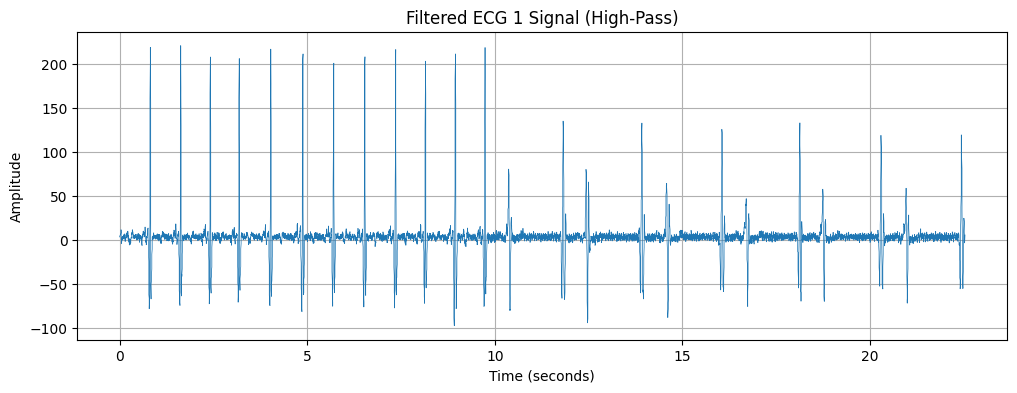

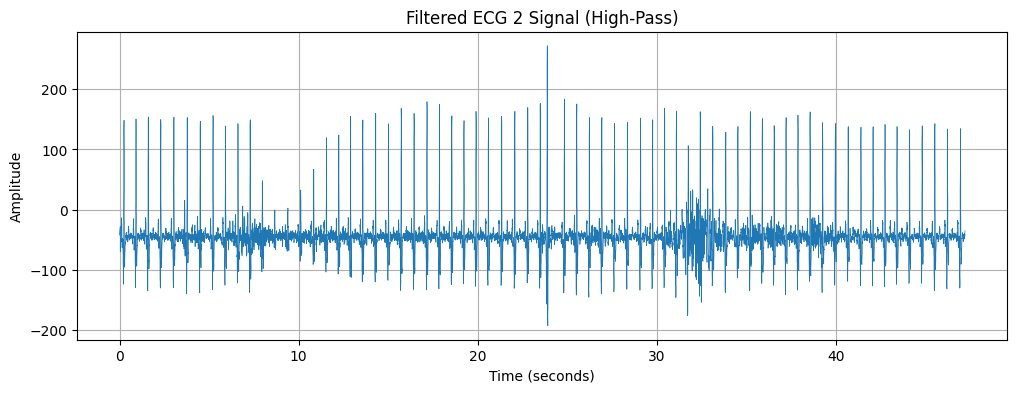

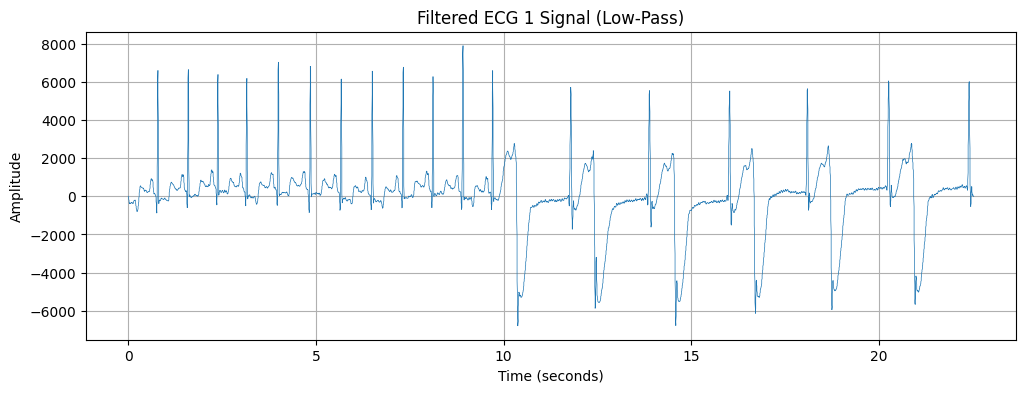

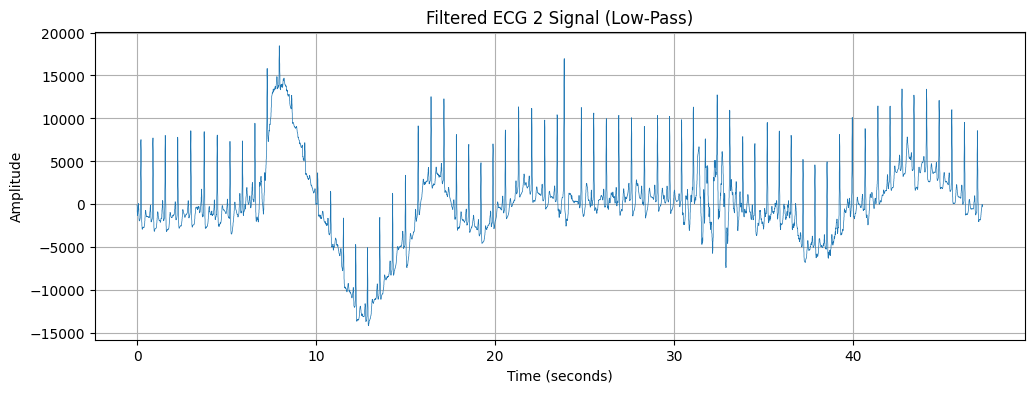

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Function to load data and clean it
def load_and_clean_data(filepath):
    data = pd.read_csv(filepath, skiprows=1)
    data['temps (s)'] = data['temps (s)'].str.replace('٫', '.').astype(float)
    data['amplitude (mv)'] = pd.to_numeric(data['amplitude (mv)'], errors='coerce')
    data['amplitude (mv)'].fillna(method='ffill', inplace=True)  # Handle NaNs
    return data

# Load ECG data
ecg1 = load_and_clean_data('/content/ECG1.csv')
ecg2 = load_and_clean_data('/content/ECG2.csv')

# High-Pass Filter Coefficients
b_hp = [-1/32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/32]  # Numerator coefficients
a_hp = [1, -1]               # Denominator coefficients

# Low-Pass Filter Coefficients
b_lp = [1, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 1]   # Numerator coefficients
a_lp = [1, -2, 1]                              # Denominator coefficients

# Function to plot frequency response
def plot_frequency_response(b, a, title):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(12, 6))

    # Magnitude response
    plt.subplot(2, 1, 1)
    plt.plot(0.5 * 360 * w / np.pi, np.abs(h), 'b')
    plt.title(f'{title} frequency response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid()

    # Phase response
    plt.subplot(2, 1, 2)
    plt.plot(0.5 * 360 * w / np.pi, np.angle(h), 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase (radians)')
    plt.grid()
    plt.show()

# Plot the frequency response for both filters
plot_frequency_response(b_hp, a_hp, 'High-pass filter')
plot_frequency_response(b_lp, a_lp, 'Low-pass filter')

# Determine if it is FIR or IIR
filter_type_hp = "IIR" if len(a_hp) > 1 else "FIR"
filter_type_lp = "IIR" if len(a_lp) > 1 else "FIR"
print(f"The high-pass filter is {filter_type_hp}.")
print(f"The low-pass filter is {filter_type_lp}.")

# Apply High-Pass Filter to ECG Signal
def apply_high_pass_filter(data, b, a):
    filtered_data = np.zeros_like(data)
    for n in range(len(data)):
        if n >= 32:
            filtered_data[n] = (filtered_data[n-1] - (1/32)*data[n] + data[n-16] - data[n-17] + (1/32)*data[n-32])
        elif n >= 17:
            filtered_data[n] = (filtered_data[n-1] - (1/32)*data[n] + data[n-16] - data[n-17])
        elif n >= 16:
            filtered_data[n] = (filtered_data[n-1] - (1/32)*data[n] + data[n-16])
        else:
            filtered_data[n] = filtered_data[n-1] - (1/32)*data[n] if n > 0 else data[n]
    return filtered_data

# Apply Low-Pass Filter to ECG Signal
def apply_low_pass_filter(data, b, a):
    filtered_data = np.zeros_like(data)
    for n in range(len(data)):
        if n >= 12:
            filtered_data[n] = 2*filtered_data[n-1] - filtered_data[n-2] + data[n] - 2*data[n-6] + data[n-12]
        elif n >= 6:
            filtered_data[n] = 2*filtered_data[n-1] - filtered_data[n-2] + data[n] - 2*data[n-6]
        elif n >= 2:
            filtered_data[n] = 2*filtered_data[n-1] - filtered_data[n-2] + data[n]
        elif n >= 1:
            filtered_data[n] = 2*filtered_data[n-1] + data[n]
        else:
            filtered_data[n] = data[n]
    return filtered_data

# Apply the filters to the ECG data
ecg1_hp_filtered = apply_high_pass_filter(ecg1['amplitude (mv)'].values, b_hp, a_hp)
ecg2_hp_filtered = apply_high_pass_filter(ecg2['amplitude (mv)'].values, b_hp, a_hp)

ecg1_lp_filtered = apply_low_pass_filter(ecg1['amplitude (mv)'].values, b_lp, a_lp)
ecg2_lp_filtered = apply_low_pass_filter(ecg2['amplitude (mv)'].values, b_lp, a_lp)

# Plot the filtered signals
def plot_ecg(time, amplitude, title):
    plt.figure(figsize=(12, 4))
    plt.plot(time, amplitude, linewidth=0.5)
    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Plotting the results
plot_ecg(ecg1['temps (s)'], ecg1_hp_filtered, 'Filtered ECG 1 Signal (High-Pass)')
plot_ecg(ecg2['temps (s)'], ecg2_hp_filtered, 'Filtered ECG 2 Signal (High-Pass)')

plot_ecg(ecg1['temps (s)'], ecg1_lp_filtered, 'Filtered ECG 1 Signal (Low-Pass)')
plot_ecg(ecg2['temps (s)'], ecg2_lp_filtered, 'Filtered ECG 2 Signal (Low-Pass)')


# 2.3

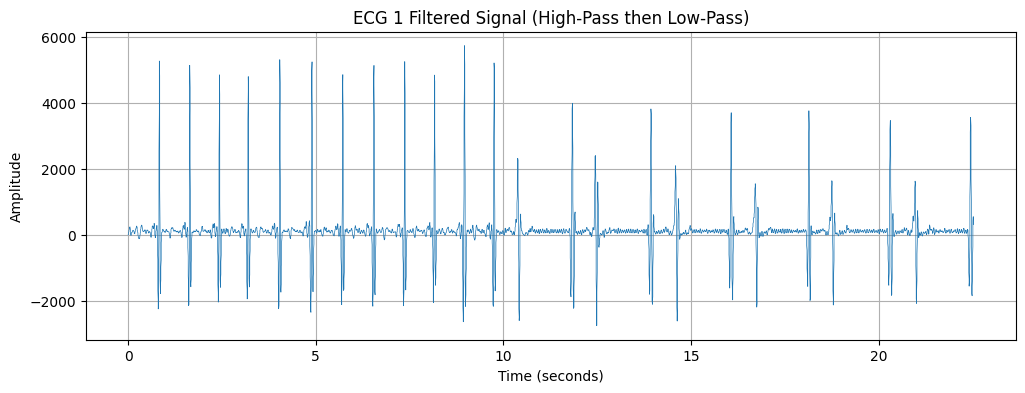

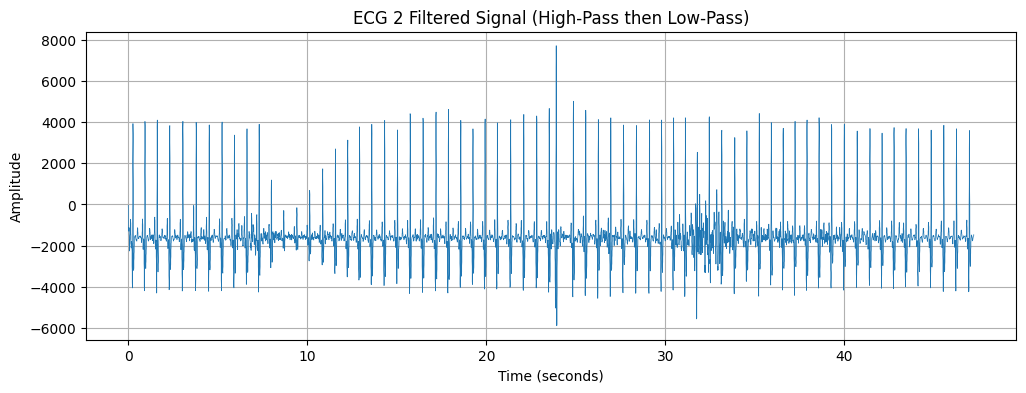

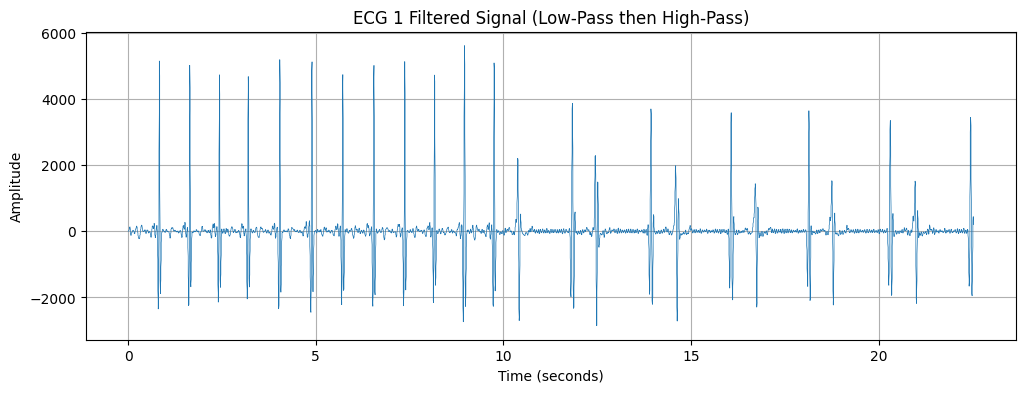

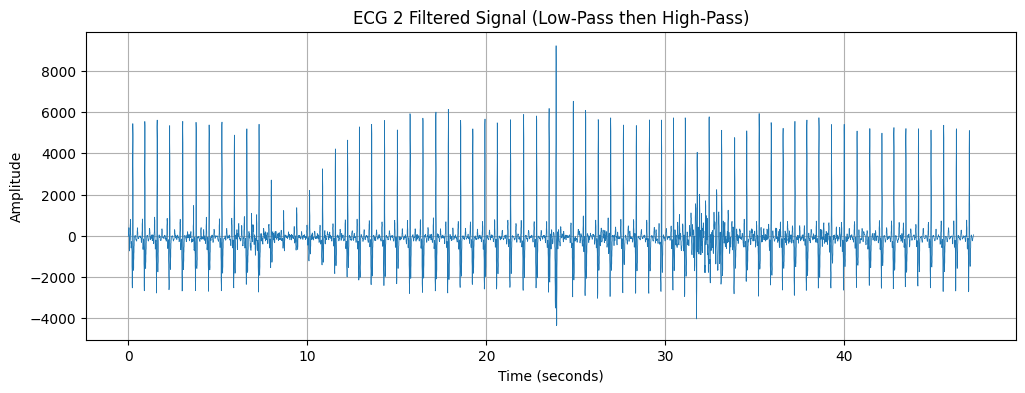

In [7]:
# Apply High-Pass Filter first, then Low-Pass Filter
ecg1_hp_lp_filtered = apply_low_pass_filter(ecg1_hp_filtered, b_lp, a_lp)
ecg2_hp_lp_filtered = apply_low_pass_filter(ecg2_hp_filtered, b_lp, a_lp)

# Apply Low-Pass Filter first, then High-Pass Filter
ecg1_lp_hp_filtered = apply_high_pass_filter(ecg1_lp_filtered, b_hp, a_hp)
ecg2_lp_hp_filtered = apply_high_pass_filter(ecg2_lp_filtered, b_hp, a_hp)

# Plot the resulting signals
plot_ecg(ecg1['temps (s)'], ecg1_hp_lp_filtered, 'ECG 1 Filtered Signal (High-Pass then Low-Pass)')
plot_ecg(ecg2['temps (s)'], ecg2_hp_lp_filtered, 'ECG 2 Filtered Signal (High-Pass then Low-Pass)')

plot_ecg(ecg1['temps (s)'], ecg1_lp_hp_filtered, 'ECG 1 Filtered Signal (Low-Pass then High-Pass)')
plot_ecg(ecg2['temps (s)'], ecg2_lp_hp_filtered, 'ECG 2 Filtered Signal (Low-Pass then High-Pass)')


# Bonus

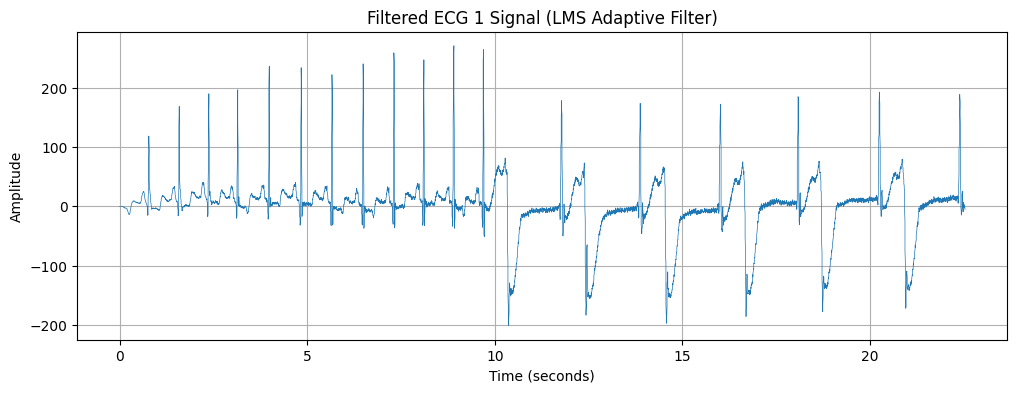

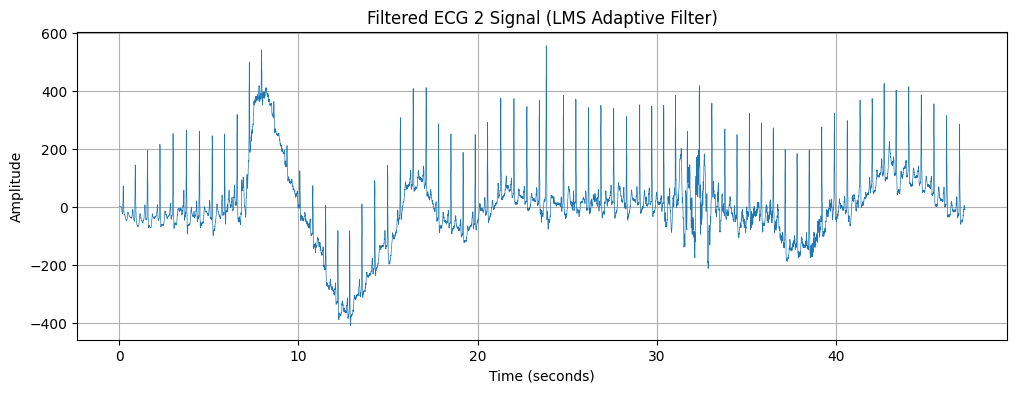

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data and clean it
def load_and_clean_data(filepath):
    data = pd.read_csv(filepath, skiprows=1)
    data['temps (s)'] = data['temps (s)'].str.replace('٫', '.').astype(float)
    data['amplitude (mv)'] = pd.to_numeric(data['amplitude (mv)'], errors='coerce')
    data['amplitude (mv)'].fillna(method='ffill', inplace=True)  # Handle NaNs
    return data

# Load ECG data
ecg1 = load_and_clean_data('/content/ECG1.csv')
ecg2 = load_and_clean_data('/content/ECG2.csv')

# Improved LMS Adaptive Filter Function
def lms_adaptive_filter(desired, input_signal, mu, filter_order):
    n = len(input_signal)
    y = np.zeros(n)
    e = np.zeros(n)
    w = np.zeros(filter_order)
    epsilon = 1e-6  # Small constant to avoid division by zero

    for i in range(filter_order, n):
        x = input_signal[i:i-filter_order:-1]
        y[i] = np.dot(w, x)
        e[i] = desired[i] - y[i]
        w = w + 2 * mu * e[i] * x / (np.dot(x, x) + epsilon)

    return y, e

# Parameters for LMS
mu = 0.01  # Step size
filter_order = 32  # Number of taps

# Apply LMS Adaptive Filter
ecg1_filtered, ecg1_error = lms_adaptive_filter(ecg1['amplitude (mv)'].values, ecg1['amplitude (mv)'].values, mu, filter_order)
ecg2_filtered, ecg2_error = lms_adaptive_filter(ecg2['amplitude (mv)'].values, ecg2['amplitude (mv)'].values, mu, filter_order)

# Plot the filtered signals
def plot_ecg(time, amplitude, title):
    plt.figure(figsize=(12, 4))
    plt.plot(time, amplitude, linewidth=0.5)
    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Plotting the results
plot_ecg(ecg1['temps (s)'], ecg1_filtered, 'Filtered ECG 1 Signal (LMS Adaptive Filter)')
plot_ecg(ecg2['temps (s)'], ecg2_filtered, 'Filtered ECG 2 Signal (LMS Adaptive Filter)')
